<a href="https://colab.research.google.com/github/douglaslpo/Estatistica-Aplicada/blob/main/Analise_de_regressao_do_Preco_das_Casas_kc_house_data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integrantes: **Douglas Leonard e Marcus Padilha**



# Instalação das bibliotecas



In [ ]:
#!pip install catboost
#!pip install shap

# Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import shap

**Descrição**: Neste trecho, são importadas bibliotecas para análise e modelagem de dados em Python, incluindo Pandas e NumPy para manipulação de dados, Seaborn e Matplotlib para visualização, e várias ferramentas do Scikit-learn para modelagem estatística e avaliação de modelos, como regressão linear, divisão de dados, métricas de desempenho e modelos avançados como KNN, Random Forest, Árvore de Decisão e XGBoost.

# Configurações do código

In [ ]:
from matplotlib.ticker import FuncFormatter
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
pd.set_option("display.precision",2)
pd.options.display.float_format = '{:.0f}'.format

**Descrição**: Este trecho de código configura várias opções e preferências para a manipulação e visualização de dados no ambiente Python. Primeiro, é importada a classe FuncFormatter do módulo matplotlib.ticker, que é usada para formatar os rótulos dos eixos em gráficos. O comando %matplotlib inline é utilizado para configurar o Jupyter Notebook para exibir gráficos inline (diretamente nas células). A função warnings.filterwarnings("ignore") desativa avisos para evitar a exibição de mensagens de alerta que podem ocorrer durante a execução do código. Em seguida, são configuradas várias opções do Pandas para a exibição de DataFrames: pd.set_option("display.max_columns", None) remove a limitação do número de colunas exibidas, pd.set_option("display.max_rows", 100) define o número máximo de linhas exibidas para 100, pd.set_option("display.precision",2) ajusta a precisão da exibição dos números para duas casas decimais, e pd.options.display.float_format = '{:.0f}'.format define o formato de exibição de números flutuantes para não mostrar casas decimais.

In [ ]:
def resizeplot(l,a):
    plt.figure(figsize=(l,a))

**Descrição**: Neste trecho de código, é definida uma função chamada resizeplot, que tem o objetivo de ajustar o tamanho de gráficos criados com a biblioteca Matplotlib. A função recebe dois parâmetros, l e a, que representam respectivamente a largura e a altura desejadas para o gráfico. Dentro da função, plt.figure(figsize=(l,a)) é chamado para definir o tamanho da figura do gráfico conforme os valores fornecidos para l e a.

In [ ]:
# Função para formatar o eixo x
def millions_formatterx(x, pos):
    return f'{int(x)}'

# Função para formatar o eixo y
def millions_formattery(y, pos):
    return f'{int(y)}'

# Importação do dataset

In [ ]:
#importando o dataset do drive para não perder o mesmo quando reiniciar o colab!
from google.colab import drive
drive.mount('/content/drive')

# Caminho onde se encontra o meu DataFrame no meu Drive!
kc_house = '/content/drive/MyDrive/datasets/kc_house_data.csv'

# Carregando o Dataframe
df = pd.read_csv(kc_house)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Descrição**: Neste trecho de código, é realizada a importação de um conjunto de dados para o ambiente do Google Colab. Primeiro, a biblioteca `google.colab` é utilizada para montar o Google Drive no Colab, garantindo que os dados permaneçam acessíveis mesmo após reiniciar o ambiente. Depois, o caminho do arquivo CSV contendo o conjunto de dados (localizado no Google Drive) é especificado. Por fim, o DataFrame é carregado usando o Pandas com a função `read_csv`, utilizando o caminho do arquivo CSV especificado.

# Limpeza e análise do dataset

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,48,-122,1340,5650
1,6414100192,20141209T000000,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,48,-122,1690,7639
2,5631500400,20150225T000000,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,48,-122,2720,8062
3,2487200875,20141209T000000,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,48,-122,1360,5000
4,1954400510,20150218T000000,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,48,-122,1800,7503


**Descrição**: Neste código, a função head() é aplicada ao DataFrame df. Esta função é usada para visualizar as primeiras linhas do DataFrame, geralmente as cinco primeiras, fornecendo uma visão rápida dos dados, incluindo nomes de colunas e alguns dos valores iniciais em cada coluna. É uma maneira útil de inspecionar rapidamente a estrutura e os primeiros dados do conjunto.

In [ ]:
df.drop(columns=['id'],inplace=True,axis=1)

**Descrição**: Neste código, o método drop é utilizado no DataFrame df para remove a coluna 'id'. O argumento inplace=True indica que a alteração deve ser feita diretamente no DataFrame df, sem a necessidade de criar um novo DataFrame. O argumento axis=1 especifica que a operação deve ser realizada nas colunas (e não nas linhas). Portanto, esta linha de código efetivamente remove a coluna 'id' do DataFrame df.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21611 non-null  float64
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

**Descrição**: Neste código, o método info() é aplicado ao DataFrame df. Este método é utilizado para obter um resumo conciso do DataFrame, incluindo informações sobre o número de entradas, a presença de valores nulos, os tipos de dados de cada coluna, e o uso de memória. É uma função útil para uma rápida inspeção dos dados e para entender a estrutura básica do DataFrame.

In [ ]:
df['bathrooms'] = np.round(df['bathrooms'])
df['floors'] = np.round(df['floors'])


**Descrição**: No trecho de código aplicado ao DataFrame df, são realizadas operações de arredondamento nas colunas 'bathrooms' e 'floors'. A função np.round da biblioteca NumPy é utilizada para arredondar os valores nessas colunas. Esta função é aplicada individualmente a cada uma das colunas 'bathrooms' e 'floors', resultando em valores arredondados para o número inteiro mais próximo. Essa operação é feita in-place, ou seja, os valores originais nas colunas 'bathrooms' e 'floors' são substituídos pelos valores arredondados.

**Justificativa**: O arredondamento dos valores nas colunas 'bathrooms' e 'floors' é uma estratégia para simplificar a análise dos dados. A contagem de banheiros ou andares são mais úteis em forma de números inteiros, especialmente para análises estatísticas e modelos de aprendizado de máquina. Isso também é útil para a simplicidade e facilidade de interpretação nos resultados da análise.







In [ ]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**Descrição**: No trecho de código aplicado ao DataFrame df, é realizada uma operação para identificar e somar valores nulos em todas as colunas. A função isnull() é aplicada ao DataFrame, que retorna um novo DataFrame de valores booleanos, onde cada valor é True se o elemento original for nulo e False caso contrário. Em seguida, a função sum() é utilizada, que soma os valores True (considerados como 1) em cada coluna, fornecendo o total de valores nulos para cada coluna no DataFrame df.

In [ ]:
df.dropna(inplace=True)

**Descrição**: Neste trecho de código, a função dropna() é aplicada ao DataFrame df. Esta função é usada para remover todas as linhas do DataFrame que contêm pelo menos um valor nulo (NaN). O parâmetro inplace=True indica que a modificação deve ser feita diretamente no DataFrame original, df, sem a necessidade de criar e atribuir a um novo DataFrame. Assim, após a execução deste código, df conterá apenas as linhas que tinham todos os valores não nulos.

**Justificativa**: Apareceu dois valores nulos na variável **sqft_above**. A remoção de linhas com valores nulos é uma técnica comum na limpeza de dados. Ao eliminar linhas com dados faltantes, assegura-se que os modelos estatísticos ou análises subsequentes sejam realizados em um conjunto de dados completo, aumentando a confiabilidade dos resultados.

In [ ]:
df.drop('date',inplace=True,axis=1)


Descrição: Neste código, a função drop é usada no DataFrame df para remover a coluna 'date'. O método drop recebe três argumentos principais: o primeiro, 'date', especifica o nome da coluna a ser removida. O segundo, inplace=True, instrui o método a realizar a alteração diretamente no DataFrame df, eliminando a necessidade de atribuir o resultado a um novo DataFrame. Por último, axis=1 define que a operação deve ser realizada nas colunas (e não nas linhas), garantindo que a coluna 'date' seja removida do DataFrame.

Justificativa: Os dados desta coluna não são mais pertinentes, uma vez que já foram derivadas dela as colunas 'Year' e 'Month'. Além disso, a exclusão de colunas irrelevantes ou redundantes ajuda a simplificar o modelo de dados, reduzindo a complexidade e potencialmente melhorando a performance de algoritmos de aprendizado de máquina.

# Criação de gráficos

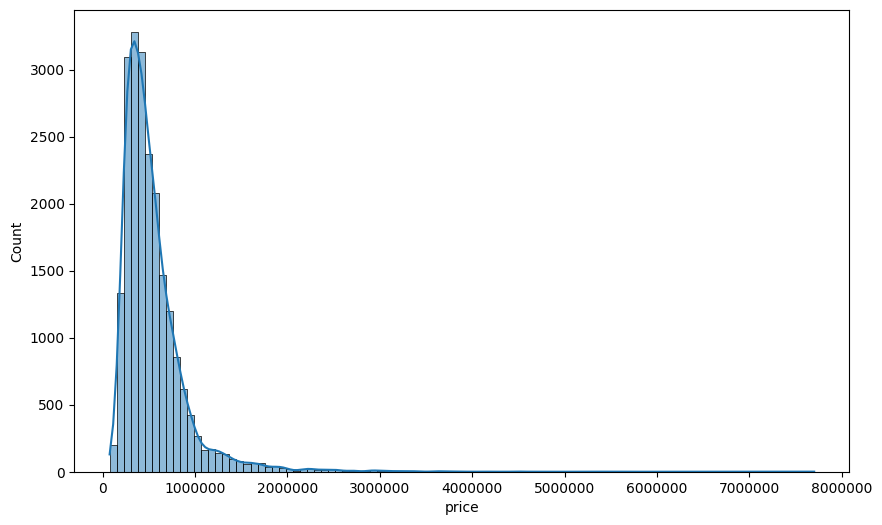

In [ ]:
resizeplot(10,6)
sns.histplot(df['price'],kde=True,bins=100)
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatterx))
plt.show()

**Descrição**: Neste trecho de código, é realizada a configuração e exibição de um histograma para a coluna 'price' do DataFrame df. Primeiro, a função resizeplot é chamada com parâmetros (10, 6) para definir o tamanho do gráfico. A função sns.histplot da biblioteca Seaborn é utilizada para criar o histograma da coluna 'price', com a adição de uma estimativa de densidade do kernel (kde=True) e definindo o número de compartimentos para 100 (bins=100). Após a criação do histograma, o formato do eixo x é ajustado usando plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatterx)), que modifica o formato dos rótulos do eixo x para o formato numérico definido pela função millions_formatterx. Finalmente, plt.show() é chamado para exibir o gráfico.

**Análise**: O histograma revela uma distribuição de preços fortemente assimétrica à direita, com uma concentração de valores à esquerda e uma longa cauda estendendo-se para preços mais altos. Esta característica sugere que, enquanto a maioria dos itens possui preços baixos a moderados, existem alguns itens com preços significativamente mais elevados, possivelmente outliers. Os picos no histograma indicam preços comuns ou preferenciais dentro do conjunto de dados. A linha de Estimativa de Densidade Kernel (KDE) sobreposta fornece uma visão suavizada da distribuição, enfatizando a assimetria e a concentração de preços mais baixos. A contagem de frequência no eixo vertical mostra que o preço mais frequente ocorre mais de 3000 vezes, destacando o preço mais comum entre os itens analisados.

<Axes: >

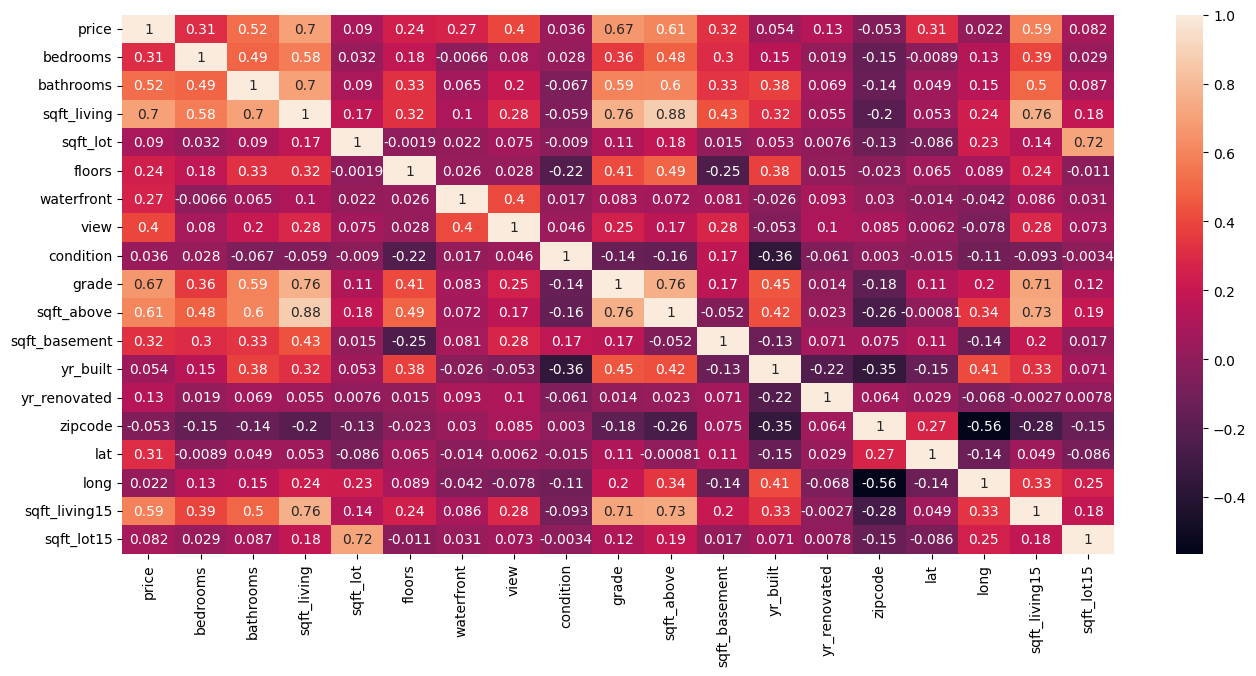

In [ ]:
resizeplot(16,7)
sns.heatmap(df.corr(),annot=True)

**Descrição**: Neste trecho de código, é realizada a exibição de um mapa de calor (heatmap) para visualizar a matriz de correlação do DataFrame df. Inicialmente, a função resizeplot é chamada com os parâmetros (16, 7) para definir o tamanho do gráfico. Em seguida, a função sns.heatmap da biblioteca Seaborn é utilizada para criar o mapa de calor. Esta função é aplicada à matriz de correlação, que é obtida através de df.corr(). O argumento annot=True é usado para garantir que os valores numéricos de correlação sejam exibidos dentro de cada célula do mapa de calor.

**Análise**: O gráfico exibe as relações lineares entre várias variáveis de um conjunto de dados imobiliários. A correlação é medida em uma escala de -1 a 1, onde 1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita, e 0 indica nenhuma correlação. Neste caso, a variável 'price' tem fortes correlações positivas com 'sqft_living' (0.7), 'grade' (0.67), e 'sqft_above' (0.61), o que sugere que casas maiores e de maior qualidade têm preços mais elevados. Há também uma correlação negativa moderada entre 'price' e 'zipcode' (-0.053), indicando uma possível variação de preços entre diferentes regiões. Outras variáveis como 'bedrooms' e 'bathrooms' também têm correlações positivas moderadas com o preço, refletindo que um número maior de quartos e banheiros tende a aumentar o valor de uma casa.

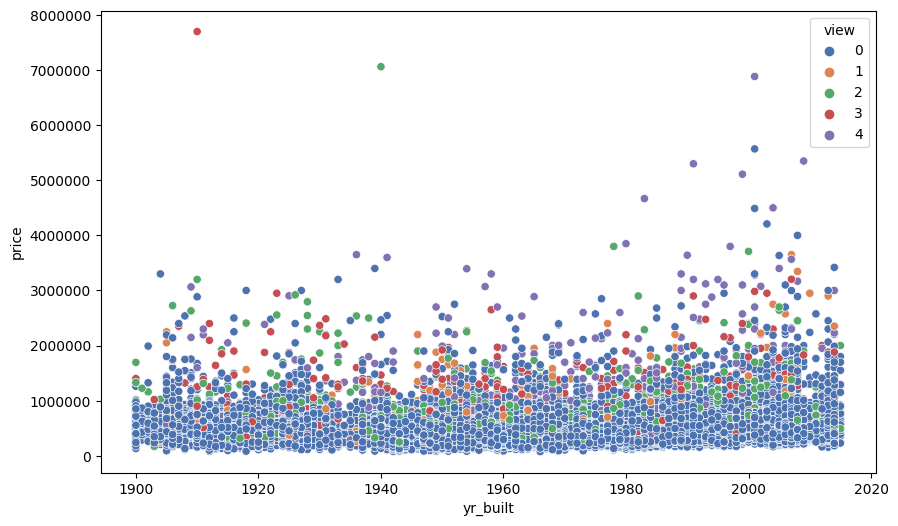

In [ ]:
resizeplot(10,6)
sns.scatterplot(x='yr_built',y='price',data=df,hue='view',palette = 'deep')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formattery))
plt.show()

**Descrição**: Neste trecho de código, é criado um gráfico de dispersão (scatter plot) para analisar a relação entre as colunas 'yr_built' (ano de construção), 'price' (preço) e 'view' do DataFrame df. Primeiramente, a função resizeplot é utilizada para definir o tamanho do gráfico (10 unidades de largura por 6 de altura), assegurando uma visualização ampla e clara. O gráfico de dispersão é gerado com a função sns.scatterplot da biblioteca Seaborn, com 'yr_built' no eixo x, 'price' no eixo y, e a coluna 'view' representada por diferentes cores (hue='view'). O argumento palette='deep' define a paleta de cores utilizada. Após a criação do gráfico, o formato dos rótulos do eixo y é ajustado usando plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formattery)), que altera a formatação para o formato numérico.

**Análise**: A imagem mostra um scatter plot que relaciona o ano de construção de imóveis (eixo x) com seus respectivos preços de venda (eixo y), coloridos de acordo com uma variável categórica denominada 'view', que varia de 0 a 4. Os pontos no gráfico são densamente agrupados em torno do período pós-1940, indicando que a maioria dos imóveis listados foi construída após essa data. Observa-se também que os preços dos imóveis apresentam uma grande variação, com a maioria concentrada na faixa inferior de preço, mas com alguns pontos, possivelmente outliers, alcançando valores muito altos. A variável 'view' parece ter alguma influência no preço, com imóveis classificados com 'view' de 3 e 4 atingindo preços mais elevados em comparação com aqueles com 'view' de 0 a 2, o que sugere que a qualidade da vista pode ser um fator na avaliação do imóvel.

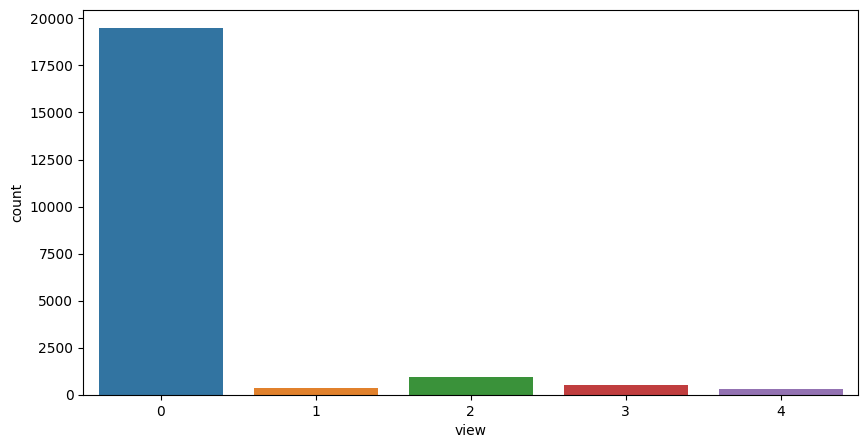

In [ ]:
resizeplot(10,5)
sns.countplot(x='view',data=df)
plt.show()

**Descrição**: Neste trecho de código, é configurado e exibido um gráfico de barras para contar a frequência da variável 'view' no DataFrame df. A função resizeplot é chamada inicialmente com os parâmetros (10, 5) para definir o tamanho do gráfico, garantindo que seja grande o suficiente para uma visualização clara. A função sns.countplot da biblioteca Seaborn é utilizada para criar o gráfico de barras, com a variável 'view' no eixo x. Este gráfico mostra o número de ocorrências de cada valor único na coluna 'view'. Por fim, plt.show() é usado para exibir o gráfico.

**Análise**: o gráfico de barras mostra uma distribuição desigual da variável 'view', que é o número de vista da propriedade, variando de 0 a 4. A grande maioria das propriedades possui uma classificação de 'view' de 0, indicando uma que não foi feita enhuma visita à propriedade. As categorias de 'view' de 1 a 4, têm significativamente menos propriedades associadas, sugerindo que uma vista de alta qualidade é um recurso menos comum nestas propriedades.

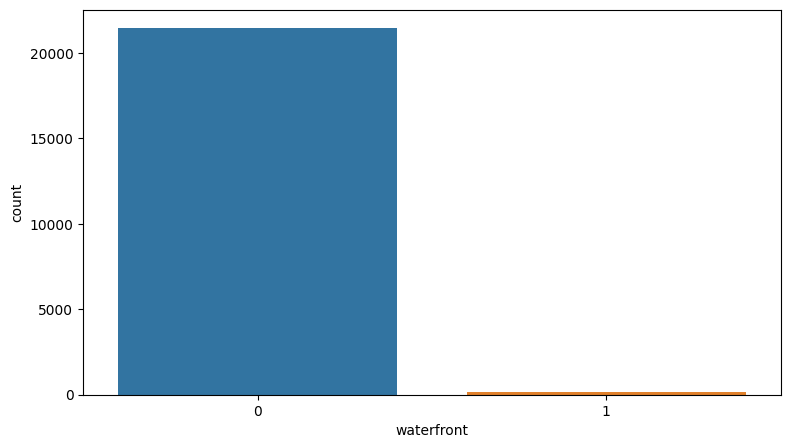

In [ ]:
resizeplot(9,5)
sns.countplot(x='waterfront',data=df)
plt.show()

**Descrição**: Neste código, é gerado um gráfico de barras para visualizar a distribuição da variável 'waterfront' no DataFrame df. Inicialmente, a função resizeplot é utilizada para ajustar o tamanho do gráfico, definindo-o com 9 unidades de largura e 5 de altura, o que facilita a visualização dos detalhes. Em seguida, a função sns.countplot da biblioteca Seaborn é usada para criar o gráfico de barras, com 'waterfront' no eixo x. Este gráfico exibe a contagem de registros para cada categoria única presente na coluna 'waterfront'. Por fim, plt.show() é chamado para efetivamente exibir o gráfico.

**Análise**: O gráfico exibe a contagem de propriedades com e sem a característica 'waterfront', que indica se a propriedade tem vista para o mar. A barra correspondente ao valor 0 (sem vista para o mar) é muito mais alta do que a barra para o valor 1 (com vista para o mar), demonstrando que uma quantidade esmagadora de propriedades no conjunto de dados não possui essa característica.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21611 non-null  float64
 1   bedrooms       21611 non-null  int64  
 2   bathrooms      21611 non-null  float64
 3   sqft_living    21611 non-null  int64  
 4   sqft_lot       21611 non-null  int64  
 5   floors         21611 non-null  float64
 6   waterfront     21611 non-null  int64  
 7   view           21611 non-null  int64  
 8   condition      21611 non-null  int64  
 9   grade          21611 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21611 non-null  int64  
 12  yr_built       21611 non-null  int64  
 13  yr_renovated   21611 non-null  int64  
 14  zipcode        21611 non-null  int64  
 15  lat            21611 non-null  float64
 16  long           21611 non-null  float64
 17  sqft_living15  21611 non-null  int64  
 18  sqft_l

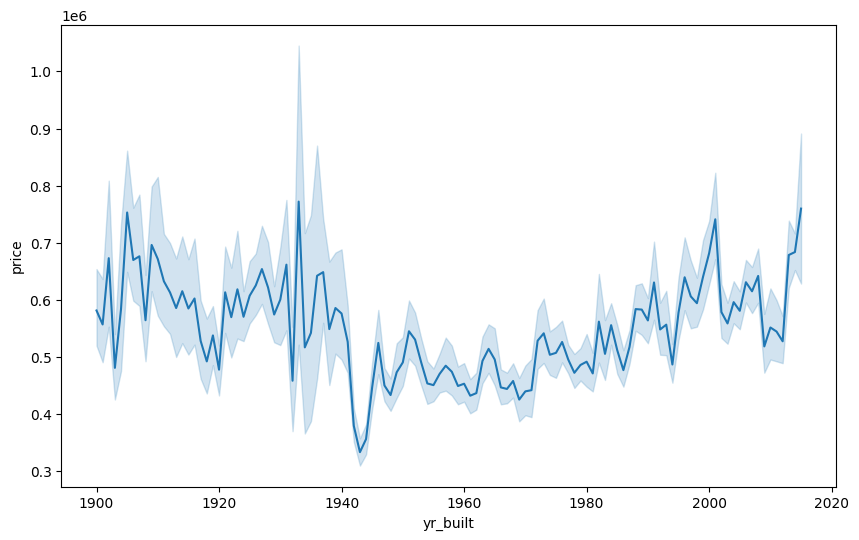

In [ ]:
resizeplot(10,6)
sns.lineplot(x='yr_built',y='price',data=df)
plt.show()

**Descrição**: Neste trecho de código, é criado um gráfico de linha para analisar a relação entre o ano ('yr_built') e os preços ('price') no DataFrame df. Inicialmente, a função resizeplot é chamada com os parâmetros (10, 6) para ajustar o tamanho do gráfico, garantindo uma visualização ampla e clara. Em seguida, a função sns.lineplot da biblioteca Seaborn é utilizada para gerar o gráfico de linha, com 'Year' no eixo x e 'price' no eixo y. Este gráfico irá traçar a tendência dos preços ao longo dos anos representados no DataFrame. Por fim, plt.show() é usado para exibir o gráfico.

**Análise**: Este gráfico mostra a tendência dos preços de propriedades ao longo do tempo, especificamente durante o ano de 2014. O eixo x indica o tempo, dividido em frações do ano, e o eixo y representa o preço das propriedades. A linha azul no gráfico sugere uma tendência de aumento nos preços ao longo do ano, já que a linha possui uma inclinação positiva. A área sombreada em azul representa a variação de preços ou um intervalo de confiança em torno da estimativa da tendência central. O gráfico indica que houve um crescimento constante nos preços das propriedades ao longo do ano de 2014.


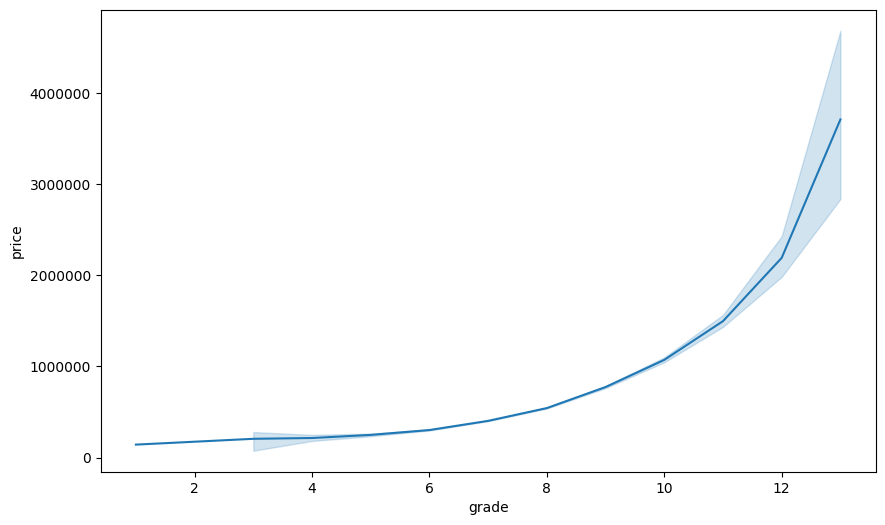

In [ ]:
resizeplot(10,6)
sns.lineplot(x='grade',y='price',data=df,palette='terrain')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formattery))
plt.show()

**Descrição**: Neste código, primeiro, a função resizeplot é chamada com os parâmetros (10, 6) para definir o tamanho do gráfico, assegurando uma visualização ampla. Em seguida, a função sns.lineplot da biblioteca Seaborn é usada para gerar o gráfico, com 'grade' no eixo x e 'price' no eixo y, e o parâmetro palette='terrain' para definir a paleta de cores. Depois, o formato dos rótulos do eixo y é ajustado com plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formattery)), alterando a formatação para um estilo numérico.

**Análise**: O gráfico  ilustra a relação entre a variável 'grade', que é um índice de qualidade e design da construção de propriedades, e a variável 'price', representando o preço das propriedades. A escala do 'grade' vai de 1 a 13, onde valores mais altos indicam melhor qualidade e design. O eixo x mostra o 'grade', enquanto o eixo y representa o 'price'. Observa-se uma tendência exponencial no gráfico, com preços aumentando drasticamente à medida que a qualidade e o design ('grade') melhoram, especialmente a partir do 'grade' 8 em diante. A área sombreada em azul indica a variação ou o intervalo de confiança para os preços associados a cada 'grade'. Esta tendência sugere que há um preço significativamente maior associado às propriedades de alta qualidade, o que é consistente com o entendimento do mercado imobiliário onde melhores qualidades e design comandam preços mais altos.


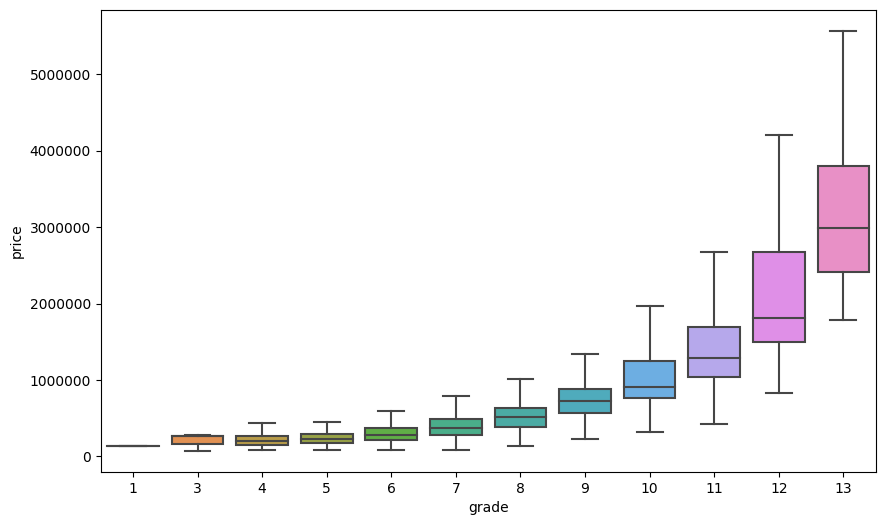

In [ ]:
resizeplot(10,6)
sns.boxplot(x='grade',y='price',data=df,showfliers=False)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formattery))
plt.show()

**Descrição**: Neste segmento de código, é gerado um gráfico de caixa (boxplot). A função resizeplot é inicialmente utilizada para estabelecer o tamanho do gráfico, visando uma visualização detalhada. O gráfico de caixa é criado usando a função sns.boxplot da biblioteca Seaborn, com 'grade' no eixo x e 'price' no eixo y. O parâmetro showfliers=False é especificado para omitir os outliers do gráfico. Em seguida, a formatação dos rótulos do eixo y é ajustada para representar valores numéricos.

**Análise**: O gráfico ilustra a distribuição dos preços das propriedades em relação a diferentes categorias de 'grade', um índice que avalia a qualidade e o design da construção de imóveis. O 'grade' varia de 1 a 13, com números mais altos representando qualidade e design superiores. As caixas representam os quartis intermediários dos preços para cada 'grade', com a linha dentro da caixa marcando a mediana. As extremidades das caixas definem o primeiro e terceiro quartis, enquanto as linhas verticais se estendem para mostrar o resto da distribuição, excluindo pontos considerados outliers, que são marcados individualmente. Através do gráfico, pode-se observar que, à medida que o 'grade' aumenta, há uma tendência clara de aumento nos preços das propriedades. As mediana e a variabilidade dos preços também aumentam com 'grades' mais altos. Por exemplo, propriedades com 'grade' 13 têm uma mediana de preço muito mais alta e uma variação maior comparadas às propriedades com 'grade' inferior. Além disso, observa-se que para 'grades' mais altos, a dispersão dos preços é mais ampla, sugerindo que há uma maior variação no valor dessas propriedades.

<Figure size 1000x600 with 0 Axes>

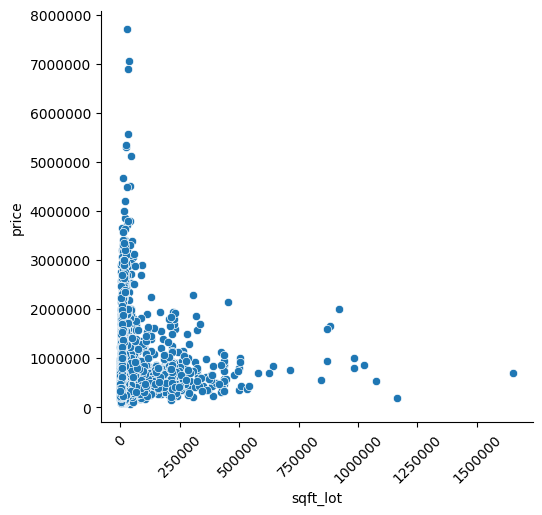

In [ ]:
resizeplot(10,6)
sns.relplot(x='sqft_lot',y='price',data=df,palette='terrain')
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatterx))
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formattery))
plt.xticks(rotation=45)
plt.show()

**Descrição**: Neste trecho de código, é criado um gráfico de relação (relplot) para analisar a relação entre a área do lote ('sqft_lot') e o preço ('price') no DataFrame df. Inicialmente, a função resizeplot é usada para definir o tamanho do gráfico (10 de largura por 6 de altura), proporcionando uma visualização adequada. A função sns.relplot da biblioteca Seaborn é utilizada para gerar o gráfico, com 'sqft_lot' no eixo x, 'price' no eixo y, e a paleta de cores 'terrain'. Após a criação do gráfico, os formatos dos rótulos dos eixos x e y são ajustados com FuncFormatter(millions_formatterx) e FuncFormatter(millions_formattery), respectivamente, para formatar os valores em numéricos. Além disso, plt.xticks(rotation=45) é usado para rotacionar os rótulos do eixo x em 45 graus, melhorando a legibilidade. Finalmente, plt.show() é chamado para exibir o gráfico.

**Análise**: O gráfico de dispersão que você forneceu mostra a relação entre a metragem quadrada do terreno das propriedades ('sqft_lot') e seus respectivos preços ('price'). A distribuição dos pontos sugere que a maioria das propriedades tem um tamanho de terreno menor, com um agrupamento de pontos mais denso na faixa de terrenos menores. Enquanto isso, os preços das propriedades parecem não aumentar proporcionalmente com o aumento da metragem quadrada do terreno. De fato, várias propriedades com terrenos menores têm preços tão altos quanto ou maiores do que propriedades com terrenos maiores.


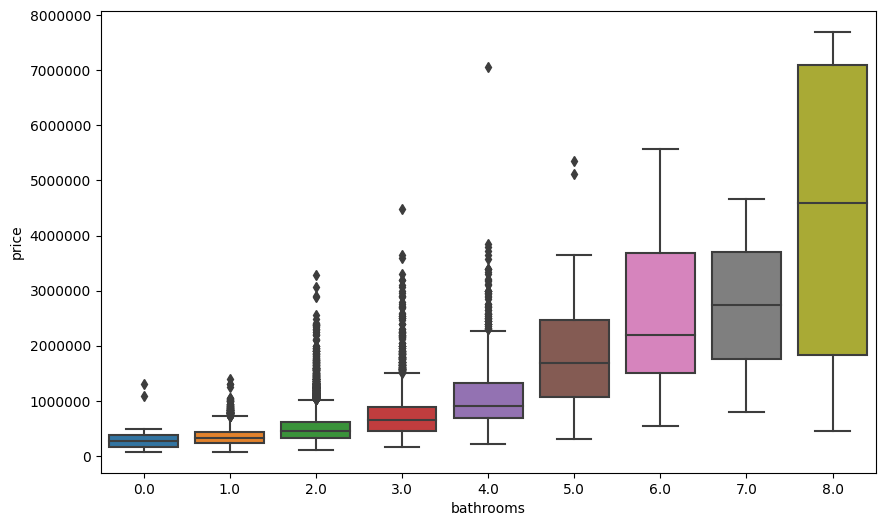

In [ ]:
resizeplot(10,6)
sns.boxplot(x='bathrooms',y='price',data=df)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formattery))
plt.show()

**Descrição**: Este trecho de código cria um gráfico de caixa (boxplot) para explorar a relação entre o número de banheiros ('bathrooms') e o preço ('price') no DataFrame df. Primeiro, a função resizeplot é utilizada para definir o tamanho do gráfico em 10 unidades de largura e 6 de altura, garantindo uma visualização clara e detalhada. Em seguida, a função sns.boxplot da biblioteca Seaborn é usada para gerar o gráfico de caixa, com 'bathrooms' no eixo x e 'price' no eixo y. Após a criação do gráfico, o formato dos rótulos do eixo y é ajustado usando FuncFormatter(millions_formattery), que modifica a apresentação dos valores de preço para um formato numérico. Por fim, plt.show() é chamado para exibir o gráfico.

**Análise**: O gráfico ilustra que há uma tendência de aumento nos preços das propriedades com o crescimento no número de banheiros, refletindo que banheiros adicionais podem ser um indicador de maior valor de mercado. As mediana e a variação dos preços se expandem com o aumento do número de banheiros, sugerindo que propriedades com mais banheiros elevam seu preço. Outliers, especialmente em categorias de 4 a 8 banheiros, apontam para a presença de propriedades com preços excepcionais que não são explicados apenas pelo número de banheiros, indicando a influência de outros fatores de valorização imobiliária.

**We can see that the residences have more houses with 3 and 4 bedrooms than the others, which leads us to realize that there are several other attributes that value the house and not just bedrooms and bathrooms.**

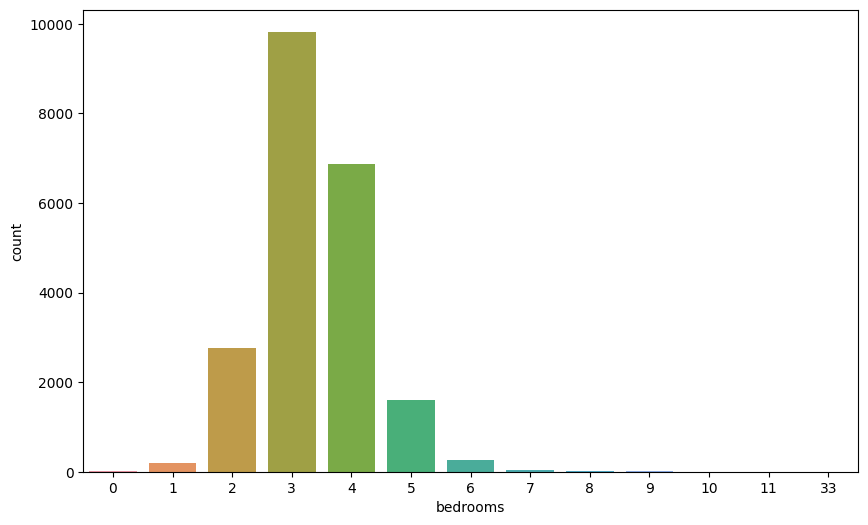

In [ ]:
resizeplot(10,6)
sns.countplot(x='bedrooms',data=df)
plt.show()

**Descrição**: Neste trecho de código, é criado um gráfico de barras (countplot) para analisar a distribuição do número de quartos ('bedrooms') no DataFrame df. A função resizeplot é utilizada para definir o tamanho do gráfico em 10 unidades de largura e 6 de altura, garantindo uma visualização ampla e detalhada. A função sns.countplot da biblioteca Seaborn é usada para gerar o gráfico de barras, com a variável 'bedrooms' no eixo x, representando a frequência de cada quantidade de quartos presente no DataFrame. Por fim, plt.show() é chamado para exibir o gráfico.

**Análise**: O gráfico exibe a contagem de propriedades categorizadas pelo número de quartos. A maioria das propriedades possui de 3 a 4 quartos, como evidenciado pelas barras mais altas, indicando que são configurações comuns e possivelmente as mais demandadas no mercado. A contagem de propriedades diminui para aquelas com menos de 3 ou mais de 4 quartos, sugerindo que configurações extremas são menos comuns. A presença de propriedades com um número muito alto de quartos, como 33, é atípica, como mostrado pela barra única na extremidade direita do gráfico, podendo representar casos excepcionais ou erros de entrada de dados.

# Criação dos modelos de aprendizado de máquina

## Preparação dos dados

In [ ]:
X = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y)

**Descrição**: Neste código, é realizada a preparação de dados para modelagem estatística. A variável X é criada selecionando várias colunas relevantes do DataFrame df, incluindo 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15' e 'sqft_lot15', que são consideradas variáveis preditoras. Estes dados são convertidos em um array NumPy. A variável dependente, 'price', é isolada e armazenada na variável y como um array NumPy. Em seguida, a função train_test_split é usada para dividir esses arrays em conjuntos de treinamento e teste, com 70% dos dados sendo alocados para treinamento e 30% para teste, como indicado pelo test_size=0.3.

**Justificativa**: A divisão dos dados em conjuntos de treinamento e teste é uma prática padrão em projetos de aprendizado de máquina e modelagem estatística. O conjunto de treinamento é usado para desenvolver e ajustar o modelo, enquanto o conjunto de teste é usado para avaliar a performance e a capacidade do modelo de generalizar para novos dados. A seleção de variáveis para X baseia-se em características que são presumivelmente influentes no preço das propriedades, uma abordagem comum na modelagem preditiva no setor imobiliário. Utilizar uma divisão de 70/30 entre os dados de treinamento e teste é um equilíbrio comum que permite treinar o modelo eficazmente, mantendo uma quantidade suficiente de dados para uma avaliação precisa do modelo.

## Treinamento dos algoritmos

### Random forest regressor

In [ ]:
rfr = RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200,n_jobs=-1)
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)

**Descrição**: Este código descreve a criação, treinamento e utilização de um modelo de regressão de Florestas Aleatórias. Primeiramente, o modelo RandomForestRegressor é instanciado com parâmetros específicos: max_depth=15, que limita a profundidade máxima das árvores a 15; min_samples_leaf=2, que exige pelo menos dois exemplos em cada folha das árvores; min_samples_split=2, que define o número mínimo de amostras necessárias para dividir um nó interno; n_estimators=200, que configura o modelo para usar 200 árvores; e n_jobs=-1, permitindo o uso de todos os processadores disponíveis. Em seguida, o modelo é treinado com os conjuntos X_train e y_train utilizando o método fit. Após o treinamento, o modelo é usado para fazer previsões no conjunto de teste X_test através do método predict, resultando nas previsões armazenadas em y_pred.


In [ ]:
print(f"Coeficiente de determinação R2 de treinnto: {rfr.score(X_train,y_train):.5f}")
print(f"Coeficiente de determinação R2 de teste: {metrics.r2_score(y_test, y_pred):.5f}")
print(f"Erro médio absoluto (MAE): {metrics.mean_absolute_error(y_test, y_pred):.5f}")
print(f"Erro médio quadrático (MSE): {metrics.mean_squared_error(y_test, y_pred):.5f}")

Coeficiente de determinação R2 de trinamento: 0.96649
Coeficiente de determinação R2 de teste: 0.89111
Erro médio absoluto (MAE): 68050.51437
Erro médio quadrático (MSE): 15136589606.48937


**Descrição**: Neste trecho de código, são impressas várias métricas para avaliar o desempenho do modelo de Florestas Aleatórias. Primeiro, é calculado  o coeficiente de determinação R2 para o conjunto de treinamento usando rfr.score(X_train, y_train), que fornece uma medida de quão bem as previsões do modelo se ajustam aos dados de treinamento. Em seguida, o coeficiente de determinação R2 para o conjunto de teste é calculado com metrics.r2_score(y_test, y_pred) e também impresso, avaliando o ajuste do modelo aos dados de teste. Além disso, são calculados e impressos o Erro Médio Absoluto (MAE) e o Erro Médio Quadrático (MSE) para o conjunto de teste, usando metrics.mean_absolute_error(y_test, y_pred) e metrics.mean_squared_error(y_test, y_pred), respectivamente. Estes valores fornecem uma medida da magnitude dos erros nas previsões do modelo.

### Linear regressor

In [ ]:
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

**Descrição**: Neste trecho de código, é criado, treinado e utilizado um modelo de regressão linear. Primeiro, a classe LinearRegression do Scikit-learn é instanciada para criar o objeto lr, com o parâmetro n_jobs=-1 configurado para permitir o uso de todos os processadores disponíveis. Em seguida, o modelo é treinado com os conjuntos de dados X_train e y_train usando o método fit. Após o treinamento, o modelo é aplicado ao conjunto de teste X_test para gerar previsões, que são armazenadas na variável y_pred, utilizando o método predict.

In [ ]:
print(f"Coeficiente de determinação R2 de treinamento: {lr.score(X_train,y_train):.5f}")
print(f"Coeficiente de determinação R2 de teste: {metrics.r2_score(y_test, y_pred):.5f}")
print(f"Erro médio absoluto (MAE): {metrics.mean_absolute_error(y_test, y_pred):.5f}")
print(f"Erro médio quadrático (MSE): {metrics.mean_squared_error(y_test, y_pred):.5f}")

Coeficiente de determinação R2 de treinamento: 0.70112
Coeficiente de determinação R2 de teste: 0.69932
Erro médio absoluto (MAE): 126977.42275
Erro médio quadrático (MSE): 41795450956.57925


### Decision tree regressor

In [ ]:
dtr = DecisionTreeRegressor(max_depth=5, min_samples_leaf=6,min_samples_split=20)
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)

**Descrição**: Este código descreve a criação, treinamento e uso de um modelo de árvore de decisão para regressão. Inicialmente, é instanciada a classe DecisionTreeRegressor do Scikit-learn para criar o objeto dtr. O modelo é configurado com parâmetros específicos: max_depth=5, que limita a profundidade máxima da árvore a 5 níveis; min_samples_leaf=6, que exige um mínimo de 6 amostras em cada folha da árvore; e min_samples_split=20, que define 20 como o número mínimo de amostras necessárias para dividir um nó interno. O modelo é então treinado utilizando os conjuntos de dados X_train e y_train através do método fit. Após o treinamento, o modelo é utilizado para fazer previsões no conjunto de teste X_test usando o método predict, resultando nas previsões armazenadas na variável y_pred.

In [ ]:
print(f"Coeficiente de determinação R2 de treinamento: {dtr.score(X_train,y_train):.5f}")
print(f"Coeficiente de determinação R2 de teste: {metrics.r2_score(y_test, y_pred):.5f}")
print(f"Erro médio absoluto (MAE): {metrics.mean_absolute_error(y_test, y_pred):.5f}")
print(f"Erro médio quadrático (MSE): {metrics.mean_squared_error(y_test, y_pred):.5f}")

Coeficiente de determinação R2 de treinamento: 0.74217
Coeficiente de determinação R2 de teste: 0.72763
Erro médio absoluto (MAE): 114579.67918
Erro médio quadrático (MSE): 37859802184.96230


## KNN regressor

In [ ]:
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(X_train,y_train)
y_pred = knr.predict(X_test)

**Descrição**: Neste trecho de código, é implementado um modelo de regressão usando a técnica de K Vizinhos Mais Próximos (K-Nearest Neighbors - KNN). Primeiramente, a classe KNeighborsRegressor do Scikit-learn é instanciada para criar o objeto knr, com o número de vizinhos configurado para 3 (n_neighbors = 3). Esse parâmetro define quantos vizinhos mais próximos serão considerados na predição. Após a instanciação, o modelo knr é treinado com os conjuntos de dados X_train e y_train utilizando o método fit. Este método ajusta o modelo aos dados de treinamento. Em seguida, o modelo treinado é aplicado ao conjunto de teste X_test para realizar previsões, que são armazenadas na variável y_pred, através do método predict.

In [ ]:
print(f"Coeficiente de determinação R2 de treinamento: {knr.score(X_train,y_train):.5f}")
print(f"Coeficiente de determinação R2 de teste: {metrics.r2_score(y_test, y_pred):.5f}")
print(f"Erro médio absoluto (MAE): {metrics.mean_absolute_error(y_test, y_pred):.5f}")
print(f"Erro médio quadrático (MSE): {metrics.mean_squared_error(y_test, y_pred):.5f}")

Coeficiente de determinação R2 de treinamento: 0.74552
Coeficiente de determinação R2 de teste: 0.47284
Erro médio absoluto (MAE): 163610.64100
Erro médio quadrático (MSE): 73276477438.71204


## XGBoost Regressor

In [ ]:
xgb = XGBRegressor(colsample_bytree=0.71, learning_rate=0.04, max_depth=4, n_estimators=1364, verbosity=0, gamma=0.054, n_jobs=-1)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

**Descrição**: Neste código, é configurado, treinado e utilizado um modelo de regressão baseado no XGBoost (eXtreme Gradient Boosting). Inicialmente, o modelo XGBRegressor é instanciado com vários parâmetros: colsample_bytree=0.71 define a fração de colunas a serem aleatoriamente amostradas para cada árvore, learning_rate=0.04 especifica a taxa de aprendizado, max_depth=4 limita a profundidade máxima de cada árvore, n_estimators=1364 define o número de árvores a serem construídas, verbosity=0 configura o modelo para não emitir mensagens de log, gamma=0.054 define o parâmetro de regularização mínimo para realizar uma partição, e n_jobs=-1 permite o uso de todos os processadores disponíveis. Após a configuração, o modelo é treinado com os dados X_train e y_train usando o método fit. Uma vez treinado, o modelo é aplicado ao conjunto de teste X_test para gerar previsões, armazenadas em y_pred, através do método predict.

In [ ]:
print(f"Coeficiente de determinação R2 de treinamento: {xgb.score(X_train,y_train):.5f}")
print(f"Coeficiente de determinação R2 de teste: {metrics.r2_score(y_test, y_pred):.5f}")
print(f"Erro médio absoluto (MAE): {metrics.mean_absolute_error(y_test, y_pred):.5f}")
print(f"Erro médio quadrático (MSE): {metrics.mean_squared_error(y_test, y_pred):.5f}")

Coeficiente de determinação R2 de treinamento: 0.96106
Coeficiente de determinação R2 de teste: 0.90083
Erro médio absoluto (MAE): 65090.14390
Erro médio quadrático (MSE): 13785454682.48552


## CatBoost

In [ ]:
cat_reg = CatBoostRegressor(verbose=0)
cat_reg.fit(X_train,y_train)
y_pred = cat_reg.predict(X_test)


**Descrição**: Neste trecho de código, é implementado um modelo de regressão usando o CatBoost (Categorical Boosting). Inicialmente, a classe CatBoostRegressor é instanciada para criar o objeto cat_reg, com o parâmetro verbose=0 configurado para que o modelo opere em modo silencioso, sem gerar mensagens de log durante o treinamento. Após a instanciação, o modelo cat_reg é treinado utilizando os conjuntos de dados X_train e y_train com o método fit. Este método ajusta o modelo aos dados de treinamento. Uma vez treinado, o modelo é aplicado ao conjunto de dados de teste X_test para realizar previsões, armazenadas na variável y_pred, utilizando o método predict.

In [ ]:
print(f"Coeficiente de determinação R2 de treinamento: {cat_reg.score(X_train,y_train):.5f}")
print(f"Coeficiente de determinação R2 de teste: {metrics.r2_score(y_test, y_pred):.5f}")
print(f"Erro médio absoluto (MAE): {metrics.mean_absolute_error(y_test, y_pred):.5f}")
print(f"Erro médio quadrático (MSE): {metrics.mean_squared_error(y_test, y_pred):.5f}")

Coeficiente de determinação R2 de treinamento: 0.96372
Coeficiente de determinação R2 de teste: 0.90321
Erro médio absoluto (MAE): 62764.98617
Erro médio quadrático (MSE): 13454387012.71922


# Análise do modelo com melhor desempenho (CatBoost)

## IA explicável pelo uso do SHAP (SHapley Additive exPlanations)

In [ ]:
explainer = shap.Explainer(cat_reg)
shap_values = explainer(X_train)

**Descrição**: Neste código, é implementada uma análise de interpretabilidade para o modelo de regressão CatBoost utilizando a biblioteca SHAP (SHapley Additive exPlanations). Primeiramente, um objeto Explainer é criado a partir da biblioteca SHAP, utilizando o modelo CatBoost (cat_reg) já treinado. Este Explainer é uma ferramenta que permite analisar como as diferentes variáveis contribuem para as previsões do modelo. Em seguida, o Explainer é aplicado ao conjunto de dados de treinamento X_train para calcular os valores SHAP, que são armazenados na variável shap_values. Estes valores representam a importância e o impacto de cada característica nas previsões do modelo.

**Justificativa**: A utilização de SHAP para explicar as previsões de um modelo de machine learning é uma prática importante, especialmente em modelos complexos como os baseados em gradient boosting. A interpretabilidade dos modelos serve em muitas aplicações práticas, onde entender as razões por trás das previsões é tão importante quanto a precisão das previsões em si. Os valores SHAP fornecem uma forma quantitativa e intuitiva de interpretar o impacto de cada variável nas previsões do modelo. Isso é particularmente útil para identificar quais características são mais influentes, ajudando na compreensão do modelo e na tomada de decisões baseadas em dados. A análise de SHAP pode também revelar informações sobre a estrutura dos dados e sobre o comportamento do modelo.








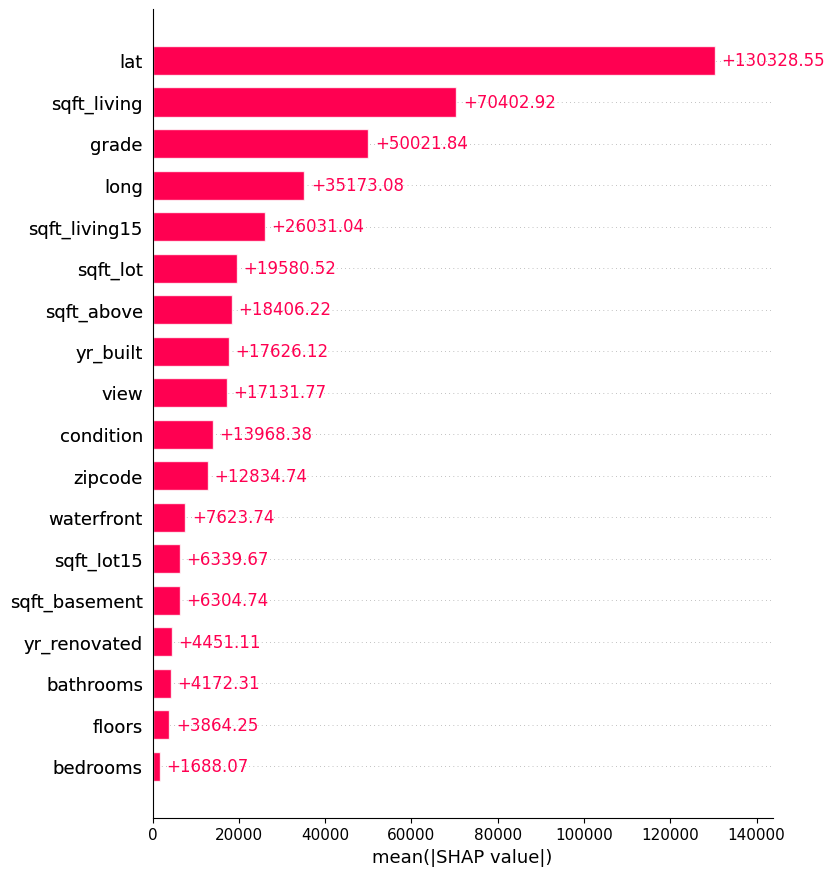

In [ ]:
shap.plots.bar(shap_values, max_display=20)

**Análise**: O gráfico mostra a importância das variáveis baseado em valores SHAP (SHapley Additive exPlanations), que são usados para medir a contribuição de cada característica na previsão de um modelo. Neste caso, o modelo está prevendo o preço de imóveis, e as barras representam o impacto médio que cada característica tem na previsão do preço.

A característica 'lat' (latitude) tem o maior valor SHAP, o que significa que tem a maior influência no preço, indicando que propriedades localizadas em determinadas latitudes tendem a ter preços mais altos. Isso é seguido por 'sqft_living' (área habitável), 'grade' (qualidade de construção e design), e 'long' (longitude), que também têm influências significativas no preço.

Características como 'waterfront' (se a casa tem vista para a água) e 'yr_renovated' (ano de renovação) também contribuem  para o preço, mas com um impacto menor comparado às características topográficas e ao tamanho da propriedade.

As barras no gráfico representam a magnitude da contribuição média. Esse tipo de gráfico serve para entender quais fatores o modelo considera mais importantes na determinação dos preços dos imóveis.

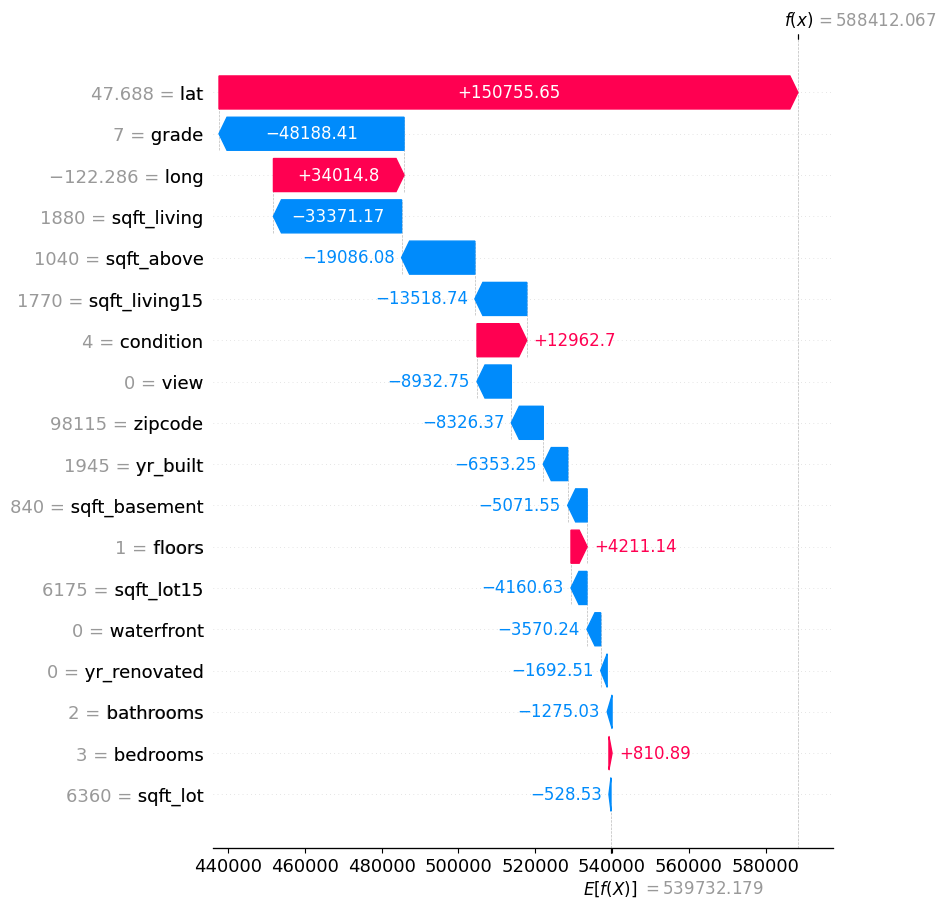

In [ ]:
shap.plots.waterfall(shap_values[1], max_display=20)

**Análise**: O gráfico de valores SHAP mostra as contribuições de cada variável para a previsão do preço de uma propriedade, com o valor base sendo o ponto de partida para as previsões. No gráfico, o valor base (f(x)) é 433007.174, que é a previsão média do modelo para o preço de uma residência escolhida antes de considerar os efeitos das variáveis.

Aqui estão os valores SHAP para as variáveis mais influentes e seus efeitos na previsão do preço:


*   'sqft_living' tem um valor SHAP de -79569.55, indicando que o tamanho maior da área habitável diminui o preço previsto em relação ao valor base.
*   'grade' tem um valor SHAP de -75571.46, sugerindo que uma classificação de qualidade mais alta está diminuindo o preço previsto para essa propriedade específica.
*   'sqft_living15' tem um valor SHAP de +26436.79, o que aumenta o preço previsto, sugerindo que áreas habitáveis maiores nos 15 vizinhos mais próximos têm uma influência positiva no valor da propriedade.
*   'long' (longitude) tem um valor SHAP de +25912.32, também contribuindo para aumentar o preço previsto.
*   'lat' (latitude) aumenta o preço previsto em +23587.06.

Os valores SHAP  mostram como cada variável, tomando o valor base como ponto de partida, afeta a previsão final do preço, positiva ou negativamente, resultando na previsão final expressa pela função f(x) para esta propriedade específica.

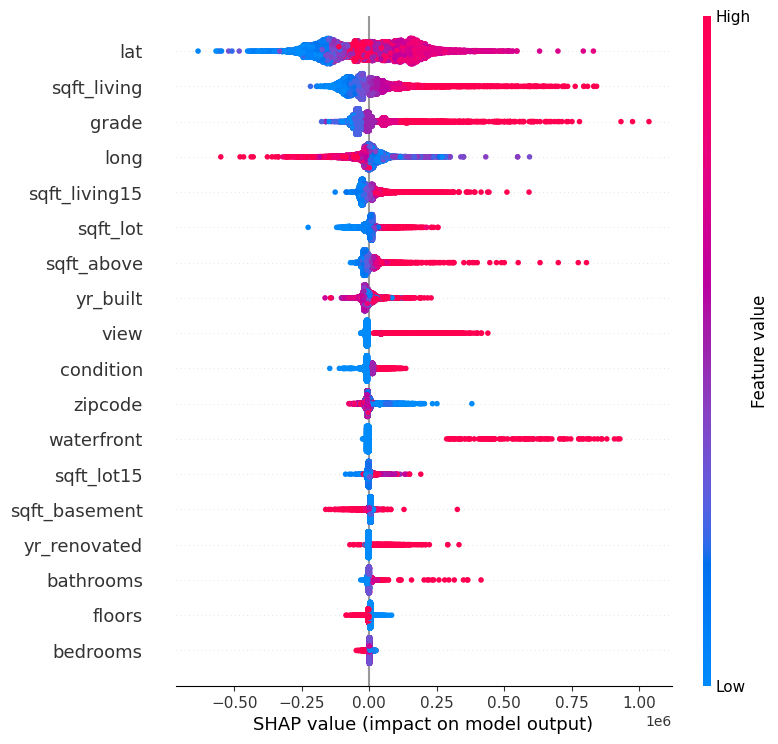

In [ ]:
shap.plots.beeswarm(shap_values, max_display=20)

O gráfico  ilustra o impacto que cada variável tem na previsão do modelo para cada observação individual no conjunto de dados.

Cada ponto no gráfico representa o valor SHAP de uma variável para uma observação individual. Os pontos são coloridos do azul ao vermelho, onde o azul indica valores baixos da característica e o vermelho indica valores altos. A posição dos pontos no eixo horizontal mostra o impacto dessa característica na previsão do modelo: pontos à esquerda do zero diminuem o preço previsto, enquanto pontos à direita aumentam o preço previsto.

Por exemplo, a característica 'lat' (latitude) parece ter uma variação grande nos valores SHAP, com valores mais altos da característica (pontos vermelhos) geralmente aumentando o preço previsto. Por outro lado, 'sqft_living' (área habitável) também mostra um impacto significativo no preço, com valores mais altos resultando em preços mais altos de propriedade.

As variáveis 'grade' (qualidade de construção e design), 'long' (longitude), e 'sqft_living15' (área habitável dos 15 vizinhos mais próximos) também mostram uma tendência de aumento nos preços com valores mais altos dessas variáveis. Variáveis como 'sqft_lot' (tamanho do terreno) e 'yr_built' (ano de construção) parecem ter um impacto menor e mais misto no preço.

Este gráfico é útil para entender não apenas a direção e magnitude do impacto das variáveis no preço, mas também como este impacto varia dependendo do valor da própria característica. Isso fornece informações sobre as relações não lineares e as interações  entre as variáveis e o preço de uma propriedade.